In [2]:
using Plots
using LinearAlgebra

In [3]:
include("source/spikes.jl")

γ (generic function with 1 method)

In [4]:
function stimcurve(x, T)
    if x >= 0 && x <= T
        return 4 / 5 * x - 40
    else # We make stimcurve(T + t) = stimcurve(t)
        return 4 / 5 * (x % T) - 40
    end
end

st(x) = stimcurve(x, 100)


st (generic function with 1 method)

In [191]:
tuncurve = TuningCurve(1, 0, 1/10)
h(x) = sin(0.1*x)
Omega = Ω(100, 0.1, tuncurve, h)
X = Omega.Ω

1001×1001 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  1  1  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0     0  0  1  0  0  0  0  0  0  0  0  1
 0  0  0  0  1  0  0  0  0  0  0  0  0     0  0  0  0  0  1  0  0  0  0  0  1
 0  0  0  0  0  0  0  1  0  0  0  0  0     0  0  0  0  0  0  0  0  0  1  0  0
 0  0  1  1  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  1  1  0  0  0  1  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  1  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0 

In [192]:
Omega.D

1001×1001 Diagonal{ComplexF64, Vector{ComplexF64}}:
 -2.96943-0.721913im           ⋅           …          ⋅              ⋅    
          ⋅           -2.96943+0.721913im             ⋅              ⋅    
          ⋅                    ⋅                      ⋅              ⋅    
          ⋅                    ⋅                      ⋅              ⋅    
          ⋅                    ⋅                      ⋅              ⋅    
          ⋅                    ⋅           …          ⋅              ⋅    
          ⋅                    ⋅                      ⋅              ⋅    
          ⋅                    ⋅                      ⋅              ⋅    
          ⋅                    ⋅                      ⋅              ⋅    
          ⋅                    ⋅                      ⋅              ⋅    
          ⋅                    ⋅           …          ⋅              ⋅    
          ⋅                    ⋅                      ⋅              ⋅    
          ⋅                    ⋅                

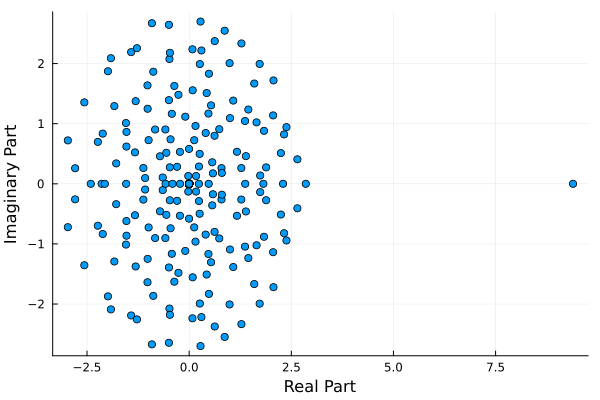

In [193]:
scatter(real.(Omega.eigenvalues), imag.(Omega.eigenvalues), xlabel="Real Part", ylabel="Imaginary Part", legend=false)

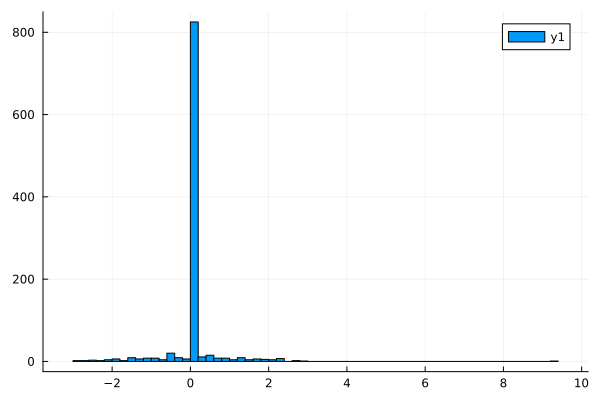

In [194]:
histogram(real.(Omega.eigenvalues))

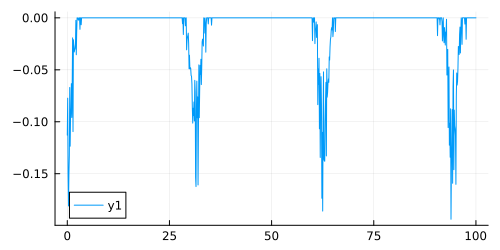

In [195]:
eigvec = real.(Omega.eigenvectors[:, end])
plot(Omega.t, (eigvec), size=(500, 250))

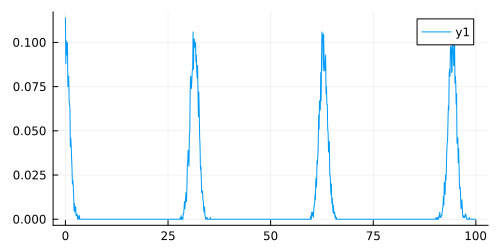

In [196]:
plot(Omega.t, sum(X, dims=2) ./ 1001, size=(500, 250))

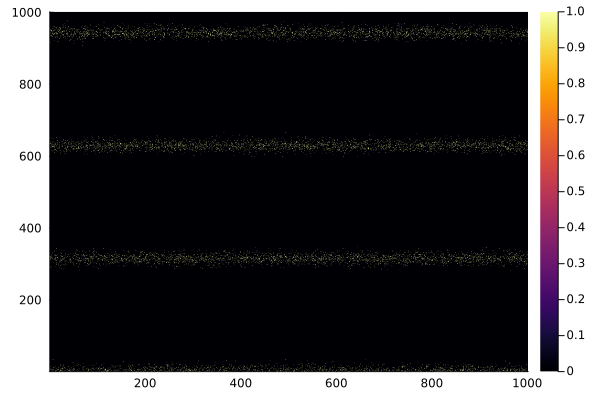

In [148]:
heatmap(X)

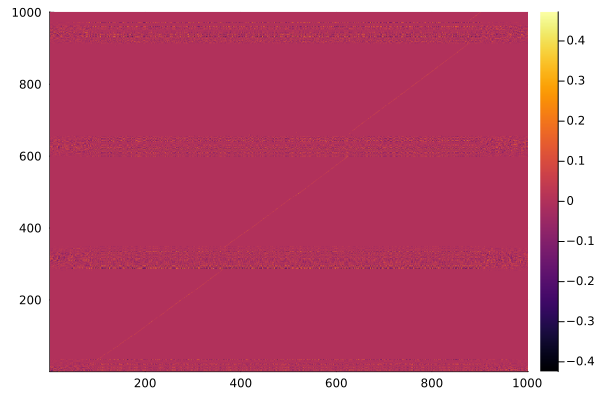

In [149]:
heatmap(real.(Omega.eigenvectors))

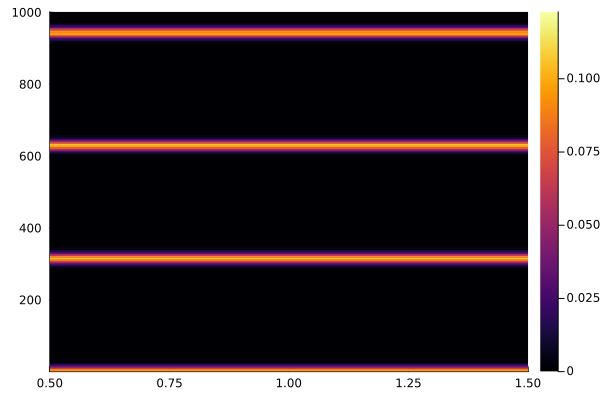

In [150]:
heatmap(sum(X ./ 1001, dims=2))

In [186]:
rows = 1001
cols = 1001

# Generate a random matrix with zeros and ones
random_matrix = rand(0:1, rows, cols)



1001×1001 Matrix{Int64}:
 1  1  1  1  1  0  1  1  1  0  0  0  1  …  0  0  0  0  1  1  0  1  0  1  1  1
 0  0  1  0  0  0  0  1  1  1  1  1  1     1  1  1  0  1  1  1  1  0  0  1  1
 0  1  1  1  0  0  0  0  0  1  1  0  0     0  0  0  0  0  0  0  1  1  0  1  0
 1  0  0  0  0  0  0  1  0  1  1  1  1     0  0  0  1  1  1  1  0  1  1  0  0
 1  1  1  1  0  0  1  1  1  0  1  0  1     0  0  0  1  1  0  0  1  0  1  1  1
 1  1  1  1  1  0  1  1  0  1  1  0  1  …  0  0  0  1  1  0  1  0  0  1  0  1
 1  1  1  1  1  0  0  0  0  0  1  0  1     1  0  1  0  0  1  1  1  0  1  1  0
 0  0  0  0  0  1  0  0  0  0  1  0  0     1  0  1  0  1  0  1  1  1  0  1  0
 1  0  0  0  0  1  1  0  0  1  0  1  1     1  0  0  1  0  0  1  1  0  1  1  1
 1  0  0  1  1  0  0  0  0  1  0  0  0     1  1  1  1  0  1  0  1  0  0  1  1
 1  0  0  0  1  1  1  0  0  1  1  1  1  …  0  0  1  1  1  0  1  0  1  1  1  0
 1  1  0  1  1  1  0  1  0  0  0  1  1     0  1  1  1  1  0  0  0  1  0  0  1
 0  0  1  1  0  0  1  1  1  0  1  1  0 

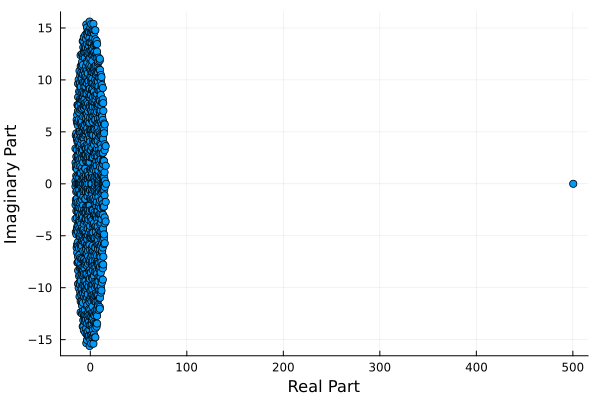

In [187]:
eigenvalues = eigen(random_matrix).values
#scatter(eigenvalues, eigenvalues, xlabel="Index", ylabel="Eigenvalue", title="Eigenvalues of Random Matrix")
scatter(real.(eigenvalues), imag.(eigenvalues), xlabel="Real Part", ylabel="Imaginary Part", legend=false)

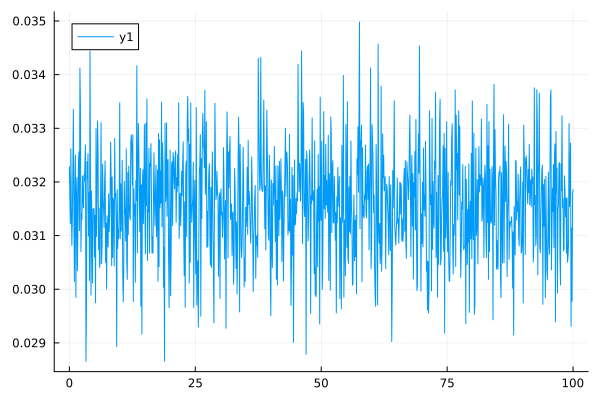

In [188]:
plot(Omega.t, real.(eigen(random_matrix).vectors[:, end]))

In [189]:
eigen(random_matrix).vectors[:, end]

1001-element Vector{ComplexF64}:
  0.03228361621831174 + 0.0im
 0.031776613849204355 + 0.0im
 0.031224317203076103 + 0.0im
  0.03261915113943168 + 0.0im
  0.03147161865605013 + 0.0im
  0.03081764848639562 + 0.0im
 0.031332463446907315 + 0.0im
 0.032256711528883535 + 0.0im
 0.033353116117168215 + 0.0im
  0.03158468311128972 + 0.0im
 0.030141477361059803 + 0.0im
 0.031872908933033135 + 0.0im
  0.03249931262828705 + 0.0im
                      ⋮
 0.030504726262610506 + 0.0im
 0.030605183011529057 + 0.0im
 0.030884223663032315 + 0.0im
 0.033089542556129566 + 0.0im
  0.03154107158977612 + 0.0im
 0.032189788752832724 + 0.0im
  0.03272882066903052 + 0.0im
 0.029308568607529156 + 0.0im
 0.031145391239111014 + 0.0im
 0.029777874293171865 + 0.0im
 0.031758968673331396 + 0.0im
 0.031854195470606854 + 0.0im

In [ ]:
using Random

function generate_matrix_with_random_zeros(n, row_index)
    matrix = zeros(Int, n, n)
    row = matrix[row_index, :]
    num_random_zeros = rand(1:n)  # Choose a random number of zeros for the nth row

    random_zero_indices = randperm(n, num_random_zeros)
    row[random_zero_indices] = 0

    return matrix
end

n = 1000  # Size of the matrix
nth_row_index = 100  # Index of the row with random zeros

result_matrix = generate_matrix_with_random_zeros(n, nth_row_index)
println(result_matrix)
